In [46]:
# Data Reference: Automobile. (1987). UCI Machine Learning Repository.
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [47]:
csv = pd.read_csv("/Users/jk/Desktop/A/Study/Data Analysis/Practice Folder/automobile.csv")

### Data Formatting Block
pd.set_option("display.max_rows", None)

df = pd.DataFrame(csv.replace("?", np.NaN))
df.dropna(inplace = True) # Drop NaN values
df = pd.get_dummies(df, columns=['fuel-type']) # Divide "fuel-type" column values into 0, 1
df["price"] = df["price"].astype(int) # Convert float64 to in64 for linspace function

In [48]:
### Data Binning Block 
bins = np.linspace(min(df["price"]), max(df["price"]), 4)
bin_label = ["Low", "Medium", "High"]
df["price-binned"] = pd.cut(df["price"], bins, labels = bin_label, include_lowest = True) 

df = df[['make', 'price', 'price-binned', 'symboling', 'aspiration', 'num-of-doors', 'fuel-type_diesel', 'fuel-type_gas', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'normalized-losses']]

In [49]:
### Data Normalization Block
df["length"] = df["length"]/df["length"].max() # standarize scale of the size value
df["height"] = df["height"]/df["height"].max() 
df["width"] = df["width"]/df["width"].max() # 

In [50]:
### Quantitative Table 
# price_binned_count = df["price-binned"].value_counts().to_frame()
# price_binned_count.rename(columns = {"price-binned":"value_counts"}, inplace = True)

# display(price_binned_count)

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,159,159,159,159,159,159,159,159,159
unique,18,2,2,5,3,1,5,5,6
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi
freq,31,132,95,79,105,159,123,136,64


,make,price,price-binned,symboling,aspiration,num-of-doors,fuel-type_diesel,fuel-type_gas,body-style,drive-wheels,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,normalized-losses
3,audi,13950,Low,2,std,four,0,1,sedan,fwd,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,164.0
4,audi,17450,Medium,2,std,four,0,1,sedan,4wd,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,164.0
6,audi,17710,Medium,1,std,four,0,1,sedan,fwd,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,158.0
8,audi,23875,Medium,1,turbo,four,0,1,sedan,fwd,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,158.0
10,bmw,16430,Medium,2,std,two,0,1,sedan,rwd,...,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,192.0
11,bmw,16925,Medium,0,std,four,0,1,sedan,rwd,...,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,192.0
12,bmw,20970,Medium,0,std,two,0,1,sedan,rwd,...,164,mpfi,3.31,3.19,9.00,121.0,4250.0,21,28,188.0
13,bmw,21105,Medium,0,std,four,0,1,sedan,rwd,...,164,mpfi,3.31,3.19,9.00,121.0,4250.0,21,28,188.0
18,chevrolet,5151,Low,2,std,two,0,1,hatchback,fwd,...,61,2bbl,2.91,3.03,9.50,48.0,5100.0,47,53,121.0
19,chevrolet,6295,Low,1,std,two,0,1,hatchback,fwd,...,90,2bbl,3.03,3.11,9.60,70.0,5400.0,38,43,98.0


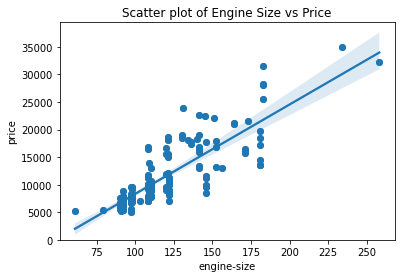

In [52]:
### Data Visualization Block 1
## Correlation between engine-size vs price which indicates that engine-size is a good predictor of price
x = df["engine-size"]
y = df["price"]

plt.title("Scatter plot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

sns.regplot(x = "engine-size", y = "price", data = df)
plt.ylim(0, )

plt.scatter(x, y)

# pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])
# display(pearson_coef, p_value)

display(df.describe(include=["object"]) ,df)